In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

1. Анализируем датасет "CS:GO Round Snapshot", в котором собраны различные данные раундов игры с разных карт.

2. Загружаем датасет:

In [43]:
url = "https://raw.githubusercontent.com/mark0wka/MachineLearning/master/csgo_round_snapshots.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(122410, 97)

3. Визуализируем данные:

In [44]:
data_raw.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [45]:
data_raw.tail()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T
122409,74.93,11.0,15.0,de_train,False,375.0,479.0,395.0,466.0,1100.0,...,3.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,T


In [46]:
data_raw.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [47]:
data_raw.index

RangeIndex(start=0, stop=122410, step=1)

Приведем столбцы к категориальному типу и получим основные характеристики ( среднее значение, стандартное отклонение, минимальное и максимальное значение, количество ненулевых элементов и т.д.) по столбцам.

In [48]:
data_raw['map'] = data_raw['map'].astype('category')
data_raw['bomb_planted'] = data_raw['bomb_planted'].astype('category')
data_raw['round_winner'] = data_raw['round_winner'].astype('category')
data_raw['round_winner'].dtype
data_raw['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [49]:
data_raw.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [50]:
data_raw.describe(include=['category'])

,map,bomb_planted,round_winner
count,122410,122410,122410
unique,8,2,2
top,de_inferno,False,T
freq,23811,108726,62406


Найдем матрицу корреляции:

In [51]:
corr_mat = data_raw.corr()
corr_mat

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
time_left,1.000000,0.000381,-0.003067,0.684514,0.678952,-0.089950,-0.195579,0.374530,0.341717,-0.103505,...,0.006278,0.007462,0.108141,0.036235,0.128073,0.004142,0.058112,0.044942,0.010688,0.018366
ct_score,0.000381,1.000000,0.626726,0.016495,-0.010987,0.100518,0.034789,0.249416,0.074700,0.181513,...,0.168219,0.051485,0.136987,0.038498,0.152342,0.008133,0.051174,0.062015,-0.011149,-0.004670
t_score,-0.003067,0.626726,1.000000,0.002840,0.001720,0.035370,0.081671,0.069768,0.258855,-0.006872,...,0.064676,0.118714,0.058564,0.104194,0.049208,0.011222,0.030615,0.144589,0.016507,-0.026379
ct_health,0.684514,0.016495,0.002840,1.000000,0.756167,0.391429,0.140262,0.306399,0.217013,0.232493,...,0.326589,0.248142,0.337015,0.266243,0.299532,-0.019960,0.046761,0.262061,0.046326,0.033921
t_health,0.678952,-0.010987,0.001720,0.756167,1.000000,0.166416,0.325604,0.236764,0.306772,0.053118,...,0.195876,0.347057,0.251135,0.341130,0.249609,0.012683,0.016732,0.312744,0.036673,0.046655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t_grenade_incendiarygrenade,0.004142,0.008133,0.011222,-0.019960,0.012683,-0.053678,0.040938,-0.000720,0.052548,-0.039537,...,-0.022308,0.054379,-0.017931,0.043893,-0.016379,1.000000,-0.020062,0.011937,-0.009436,-0.013646
ct_grenade_molotovgrenade,0.058112,0.051174,0.030615,0.046761,0.016732,0.080041,-0.068558,0.114220,0.023718,0.113158,...,0.119602,-0.027156,0.110894,-0.018945,0.061805,-0.020062,1.000000,-0.015560,-0.007780,-0.005318
t_grenade_molotovgrenade,0.044942,0.062015,0.144589,0.262061,0.312744,0.292294,0.639853,-0.054578,0.176183,0.091644,...,0.326849,0.818655,0.376916,0.812387,0.335175,0.011937,-0.015560,1.000000,0.053987,0.007665
ct_grenade_decoygrenade,0.010688,-0.011149,0.016507,0.046326,0.036673,0.096492,0.030713,-0.086894,-0.003800,0.012751,...,0.044817,0.046699,0.068453,0.051160,0.030878,-0.009436,-0.007780,0.053987,1.000000,0.010776


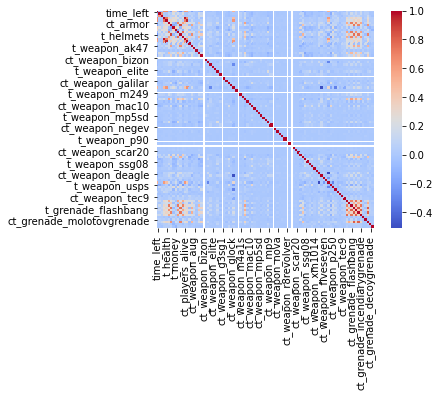

In [52]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

4. Убедимся, что пропущенных значений нет

In [53]:
data_raw.isna().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

5.Работаем с выбросами. Очень часто в игре победа зависит от количество денег у команды, т.к. если денег мало, то игроки не смогут купить себе хорошее оружие, броню и набор гранат. Но есть и редкие исключения, которые можно увидеть далее:

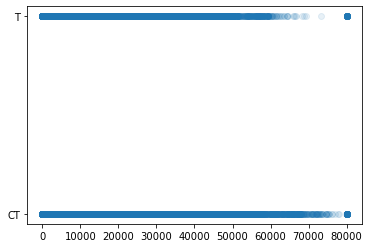

In [54]:
plt.scatter(data_raw['ct_money'], data_raw['round_winner'], alpha=0.1)
pass

In [55]:
data_raw['ct_money']

0          4000.0
1           600.0
2           750.0
3           750.0
4         18350.0
           ...   
122405      100.0
122406    11500.0
122407     1200.0
122408     1200.0
122409     1100.0
Name: ct_money, Length: 122410, dtype: float64

In [56]:
data_raw['ct_money'].quantile([0.005, 0.5, 0.995])

0.005       50.00
0.500     5500.00
0.995    56497.75
Name: ct_money, dtype: float64

In [57]:
drop_data = data_raw[(data_raw['ct_money'] < data_raw['ct_money'].quantile(0.005)) |
                    (data_raw['ct_money'] > data_raw['ct_money'].quantile(0.995))].index
data_raw = data_raw.drop(drop_data)
print(data_raw.shape)

(121316, 97)


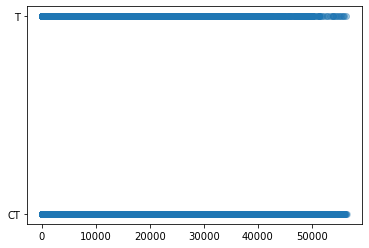

In [58]:
plt.scatter(data_raw['ct_money'], data_raw['round_winner'], alpha=0.1)
pass

Как можно видеть, мы избавились от выбросов у спецназа. Теперь избавимся от выбросов у террористов:

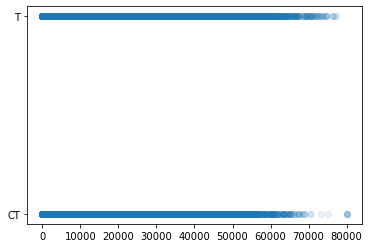

In [59]:
plt.scatter(data_raw['t_money'], data_raw['round_winner'], alpha=0.1)
pass

In [60]:
data_raw['t_money']

0          4000.0
1           650.0
2           500.0
3           500.0
4         10750.0
           ...   
122405     5950.0
122406    23900.0
122407     6700.0
122408     6700.0
122409     7000.0
Name: t_money, Length: 121316, dtype: float64

In [61]:
data_raw['t_money'].quantile([0.005, 0.5, 0.995])

0.005        0.0
0.500     7100.0
0.995    55250.0
Name: t_money, dtype: float64

In [62]:
drop_data = data_raw[(data_raw['t_money'] < data_raw['t_money'].quantile(0.005)) |
                    (data_raw['t_money'] > data_raw['t_money'].quantile(0.995))].index
data_raw = data_raw.drop(drop_data)
print(data_raw.shape)

(120710, 97)


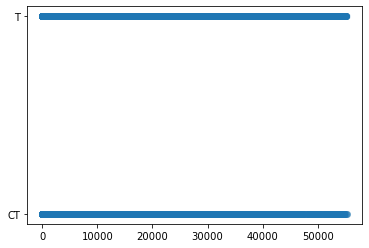

In [63]:
plt.scatter(data_raw['t_money'], data_raw['round_winner'], alpha=0.1)
pass

In [64]:
limit_val = 0.9
corr_features = set()
for i in range(len(corr_mat.columns)): 
    for j in range(i): 
        if abs(corr_mat.iloc[i, j]) > limit_val:
            colname = corr_mat.columns[i]
            corr_features.add(colname)
            
print(corr_features)

{'ct_players_alive', 't_players_alive'}


In [65]:
data_raw = data_raw.drop(labels=corr_features, axis=1)

6. Обрабатываем категориальные значения. В данном случае есть и бинарный признак и небинарный. Бинарный:

In [66]:
data_raw['bomb_planted'] = pd.factorize(data_raw['bomb_planted'])[0]
#data_raw['round_winner'] = pd.factorize(data_raw['round_winner'])[0]
y = data_raw['round_winner']
data_raw = data_raw.drop(['round_winner'], axis=1)

Небинарный:

In [67]:
map_dummies = pd.get_dummies(data_raw['map'])
map_dummies.head()

,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [68]:
data_raw = pd.concat((data_raw, map_dummies), axis=1)
data_raw = data_raw.drop(['map'], axis=1)
data_raw.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
0,175.00,0.0,0.0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,0.0,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,0,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,0.0,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,0.0,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,0.0,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,0.0,0,1,0,0,0,0,0,0


7. Проведем нормализацию:

In [69]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
data_stand.describe()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
count,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,...,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05,1.207100e+05
mean,-4.102000e-13,-4.702596e-16,8.192333e-15,3.325069e-15,-1.800337e-15,1.371819e-14,-1.199069e-15,-2.543538e-15,5.279643e-16,-3.383757e-16,...,1.017922e-14,1.133581e-14,-4.033119e-14,-1.095118e-14,-6.783445e-14,-2.078535e-14,1.458727e-13,4.309041e-14,9.288539e-15,-6.373790e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.798062e+00,-1.405320e+00,-1.408626e+00,-3.534003e-01,-3.126588e+00,-2.871204e+00,-1.851478e+00,-1.717329e+00,-9.040127e-01,-9.566225e-01,...,-1.641886e-01,-1.574603e-01,-3.455947e-02,-4.703617e-01,-4.909978e-01,-4.240939e-01,-4.280433e-01,-3.593939e-01,-3.523464e-01,-3.169291e-01
25%,-7.861968e-01,-7.734026e-01,-7.811959e-01,-3.534003e-01,-4.667367e-01,-5.874479e-01,-7.073294e-01,-7.075578e-01,-7.841390e-01,-8.199838e-01,...,-1.641886e-01,-1.574603e-01,-3.455947e-02,-4.703617e-01,-4.909978e-01,-4.240939e-01,-4.280433e-01,-3.593939e-01,-3.523464e-01,-3.169291e-01
50%,-4.927311e-02,-1.414848e-01,-1.537657e-01,-3.534003e-01,6.656000e-01,6.971647e-01,3.722774e-01,2.161536e-01,-3.909532e-01,-3.439524e-01,...,-1.641886e-01,-1.574603e-01,-3.455947e-02,-4.703617e-01,-4.909978e-01,-4.240939e-01,-4.280433e-01,-3.593939e-01,-3.523464e-01,-3.169291e-01
75%,1.277521e+00,7.010722e-01,6.828079e-01,-3.534003e-01,6.656000e-01,6.971647e-01,1.000092e+00,9.677450e-01,4.577528e-01,5.948874e-01,...,-1.641886e-01,-1.574603e-01,-3.455947e-02,-4.703617e-01,-4.909978e-01,-4.240939e-01,-4.280433e-01,-3.593939e-01,-3.523464e-01,-3.169291e-01
max,1.426601e+00,5.335136e+00,5.493106e+00,2.829629e+00,6.656000e-01,1.410838e+00,1.082236e+00,1.151340e+00,4.504690e+00,3.913884e+00,...,1.744245e+01,1.197598e+01,2.893539e+01,2.126006e+00,2.036652e+00,2.357949e+00,2.336193e+00,2.782439e+00,2.838092e+00,3.155254e+00


8. Разбиваем данные на тестовую и обучающую сборки:

In [70]:
X = data_stand
y

0         CT
1         CT
2         CT
3         CT
4         CT
          ..
122405     T
122406     T
122407     T
122408     T
122409     T
Name: round_winner, Length: 120710, dtype: category
Categories (2, object): ['CT', 'T']

In [71]:
X = X.to_numpy(dtype='f')
np.isnan(X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [72]:
np.where(np.isnan(X))

(array([     0,      0,      0, ..., 120709, 120709, 120709], dtype=int64),
 array([19, 27, 34, ..., 49, 55, 57], dtype=int64))

In [73]:
X = np.nan_to_num(X)

In [74]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [75]:
y = np.array(y != 'CT', dtype='int')
y

array([0, 0, 0, ..., 1, 1, 1])

In [76]:
print(X.shape)
print(y.shape)
N, d = X.shape

(120710, 101)
(120710,)


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

90532 30178


9. Классификация. Нейронные сети - MLP

In [78]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),
                          solver='adam',
                          activation='relu',
                          random_state=42,
                          max_iter=1000)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [79]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.12408872001060399, 0.1891112731128637)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.875911279989396

In [81]:
accuracy_score(y_test, y_test_pred)

0.8108887268871363

Точность тренировочной выборки сравнима с точностью тестовой. Посмотрим, cможем ли мы улучшить полученный результат:

In [82]:
alpha_arr = np.logspace(-3, 2, 20)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes=(100,),
                              solver='adam',
                              activation='relu',
                              random_state=42,
                              max_iter=1000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

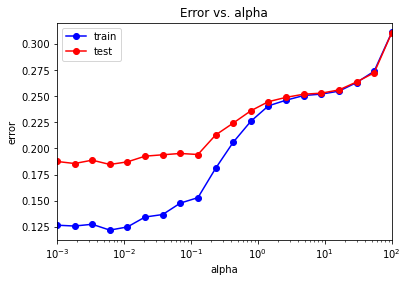

In [83]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

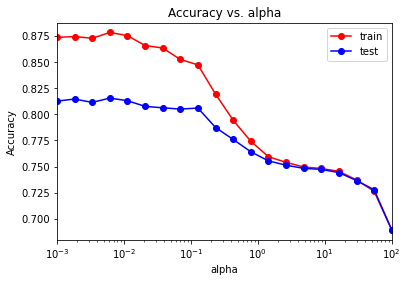

In [84]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label='train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

На графике видно, что при alpha < 1 происходит переобучение модели. Минимальное значение ошибки:

In [85]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.1218574647638404 0.1846046789051627


Найдем оптимальное значение параметра регуляции:

In [86]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00615848]


Классификатор с оптимальным значением параметра регуляции

In [87]:
alpha_opt = alpha_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,), random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.12782220651261433
0.18838226522632381


Точность обучающей и тестовой выборки:

In [88]:
accuracy_score(y_train, y_train_pred)

0.8721777934873857

In [89]:
accuracy_score(y_test, y_test_pred)

0.8116177347736762

Подбор оптимального числа нейронов:

In [90]:
neuron_arr = np.linspace(10, 500, 10).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for count in neuron_arr:
  mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(count,), max_iter=1000, random_state=42)
  mlp_model.fit(X_train, y_train)
  
  y_train_pred = mlp_model.predict(X_train)
  y_test_pred = mlp_model.predict(X_test)
  
  test_error.append(np.mean(y_test != y_test_pred))
  train_error.append(np.mean(y_train != y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))
  train_acc.append(accuracy_score(y_train, y_train_pred))

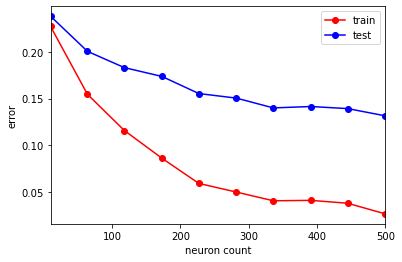

In [91]:
plt.plot(neuron_arr, train_error, 'r-o', label='train')
plt.plot(neuron_arr, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

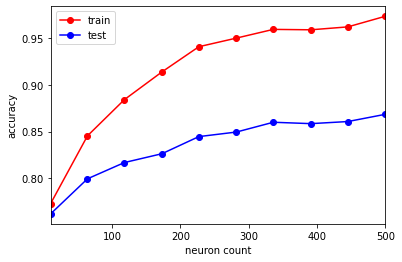

In [92]:
plt.plot(neuron_arr, train_acc, 'r-o', label='train')
plt.plot(neuron_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.xlabel('neuron count')
plt.ylabel('accuracy')
plt.legend()

Минимальное значение ошибки:

In [94]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print(min_train_error, min_test_error)

0.026200680422392084 0.13151965007621447


In [95]:
neuron_opt = neuron_arr[test_error == min_test_error]
print(neuron_opt)

[500]


Нет явной зависимости точности от числа нейронов, но мы можем видеть, что наилучшая точность достигается при количестве нейронов равном 173.

Классификатор при оптимальном значении параметра регуляризации и числа нейронов

In [96]:
neuron_opt = neuron_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,), random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.03195555162815358
0.13410431440121942


In [97]:
accuracy_score(y_train, y_train_pred)

0.9680444483718464

In [98]:
accuracy_score(y_test, y_test_pred)

0.8658956855987806

Выводы:
Недообучение не наблюдается
Переобучение при alpha < 1
В ходе подбора параметров мы незначительно снизили точность на обучающей выборке, но повысили на тестовой